RMSE: 1912.5577644701077


/home/th582/miniforge3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


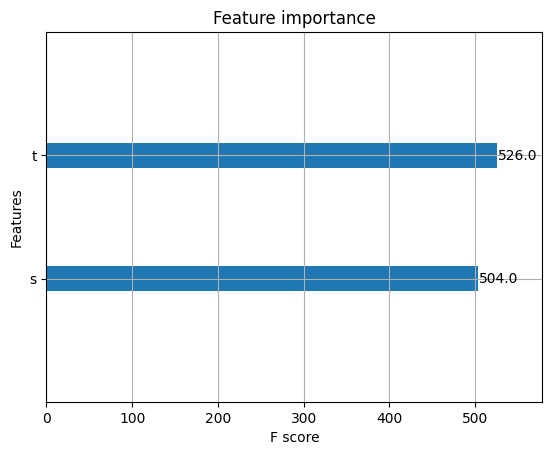

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 1899.9120559203996


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Mean_Temp_Salinity_Oxygen.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
cleaned_data = data.dropna()

# Feature variables (t and s) and target variable (oxygen)
X = cleaned_data[['t', 's']]
y = cleaned_data['oxygen']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=50)
xg_reg.fit(X_train, y_train)

# Make predictions and calculate RMSE
y_pred = xg_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Feature importance plot
xgb.plot_importance(xg_reg)
plt.show()

# Hyperparameter tuning (example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.7]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_)**0.5

print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
